In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rows = open("10.txt", "r").read().splitlines()
rows[:5]

['position=<-20515,  20790> velocity=< 2, -2>',
 'position=< 10476,  31130> velocity=<-1, -3>',
 'position=< 51833,  41457> velocity=<-5, -4>',
 'position=< 51808, -30871> velocity=<-5,  3>',
 'position=< 20845,  41465> velocity=<-2, -4>']

In [3]:
import re

pattern = re.compile("position=<([ -]\d+), ([ -]\d+)> velocity=<([ -]\d+), ([ -]\d+)>")
re.match(pattern, rows[0]).groups()

('-20515', ' 20790', ' 2', '-2')

In [4]:
input = [tuple(map(int, re.match(pattern, r).groups())) for r in rows]
df = pd.DataFrame(input)
cols = ["x", "y"]
df.tail()

,0,1,2,3
309,10460,-51536,-1,5
310,31170,-51536,-3,5
311,-20521,-41199,2,4
312,10457,-10204,-1,1
313,-41165,-10203,4,1


In [5]:
location = df.iloc[:, [1, 0]]
location.columns = cols
location.tail()

,x,y
309,-51536,10460
310,-51536,31170
311,-41199,-20521
312,-10204,10457
313,-10203,-41165


In [6]:
speed = df.iloc[:, [3, 2]]
speed.columns = cols
speed.tail()

,x,y
309,5,-1
310,5,-3
311,4,2
312,1,-1
313,1,4


In [7]:
time_to_center = location / speed
time_to_center.describe()

,x,y
count,314.000000,314.000000
mean,-10333.286040,-10341.135987
std,69.878240,81.812634
min,-10466.000000,-10511.000000
25%,-10375.000000,-10388.916667
50%,-10357.800000,-10357.800000
75%,-10290.333333,-10289.000000
max,-10200.000000,-10156.000000


So it must be somewhere around 10300-10350. Just a bit of trial and error:

In [9]:
steps = 10333

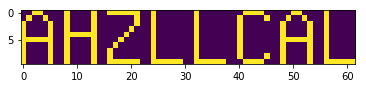

In [10]:
loc = location + speed * steps
loc -= loc.min()
vals = np.zeros(loc.max() + 1, int)
vals[loc.x.values, loc.y.values] = 1
plt.imshow(vals)
plt.show()

AHZLLCAL